In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import linprog
import folium


sites_file = "Data-partie-1/Sites.csv"
onshore_file = "Data-partie-1/Rendements_onshore.csv"
offshore_file = "Data-partie-1/Rendements_offshore.csv"

P = 500000
k = 0.17

In [63]:
df = pd.read_csv(sites_file, skiprows=1, header=None)

data = df.values

onshore_capacity = np.array([i[7] for i in data if i[5] == "Non"], dtype=np.float64)
offshore_capacity = np.array([i[7] for i in data if i[5] == "Oui"], dtype=np.float64)
n_onshore = len(onshore_capacity)
n_offshore = len(offshore_capacity)
n = n_onshore+n_offshore

df_onshore = pd.read_csv(onshore_file, header=None)
df_offshore = pd.read_csv(offshore_file, header=None)

onshore_data = df_onshore.values
offshore_data = df_offshore.values

onshore_indices = np.where(data[:, 5] == "Non")[0]
offshore_indices = np.where(data[:, 5] == "Oui")[0]

onshore_yield = onshore_data[onshore_indices].astype(np.float64)
offshore_yield = offshore_data[offshore_indices].astype(np.float64)

In [64]:
T = np.shape(onshore_yield)[1]
C = np.concatenate((onshore_capacity, offshore_capacity))
Y = np.concatenate((onshore_yield, offshore_yield))
E = C[:, np.newaxis] * Y

In [65]:
# print(c)
i_matrix_part1 = np.concatenate((np.concatenate((np.identity(n), -np.identity(n))), np.zeros((2 * n, 1))), axis=1)
i_matrix_part2 = np.concatenate((-np.transpose(E), np.ones((T, 1))), axis=1)
i_matrix = np.concatenate((i_matrix_part1, i_matrix_part2))
i_vector = np.concatenate((np.ones(n), np.zeros(n + T)))

e_matrix_row1 = np.concatenate((C, [1]))
e_matrix_row2 = np.concatenate((np.zeros(n_onshore), offshore_capacity, [1]))
e_matrix = np.array([e_matrix_row1, e_matrix_row2])
e_vector = np.array([P, k * P])

obj_func_coeffs = np.concatenate((np.zeros(n), [-1]))

solution = linprog(c=obj_func_coeffs, A_ub=i_matrix, b_ub=i_vector, A_eq=e_matrix, b_eq=e_vector)

S = solution.x[:n]
M = -solution.fun

In [66]:
E_produced = np.zeros(T)
Yield = np.zeros(T)

for j in range(T):
    E_produced[j] = np.dot(S, E[:, j])
    Yield[j] = np.dot(S, Y[:, j]) / np.sum(S)

E_total = np.sum(E_produced)
Yield_avg = np.mean(Yield)


In [67]:
latitude = [i[1] for i in data]
longitude = [i[2] for i in data]
country = [i[3] for i in data]
color = [i[4] for i in data]

latitude = pd.to_numeric(latitude, errors='coerce')
longitude = pd.to_numeric(longitude, errors='coerce')

valid_indices = np.where(~np.isnan(latitude) & ~np.isnan(longitude))
latitude = latitude[valid_indices]
longitude = longitude[valid_indices]
color = np.array(color)[valid_indices]

In [68]:
m = folium.Map(location=[np.median(latitude), np.median(longitude)], zoom_start=3)

print(S)

size = 4
# Add points to the map
for idx in range(len(latitude)):
    if S[idx] == 0:
        continue
    folium.CircleMarker(
        location=[latitude[idx], longitude[idx]],
        radius=size * S[idx], 
        color=color[idx],
        fill=True,
        fill_color=color[idx],
        fill_opacity=1.0 
    ).add_to(m)

m.save(outfile="map.html")
display(m)

[1.         1.         0.1589345  0.         0.         0.
 0.69648324 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.
 1.         1.         1.         1.         1.         1.
 0.         0.         1.         1.         0.         0.
 0.         0.         1.         1.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.43200756 1.
 0.         1.         0.         1.         1.         1.
 0.         0.         1.         0.         0.13033464 1.
 1.         1.         0.         0.         0.         0.
 1.         1.         1.         1.         1.         1.
 1.         0.         0.         0.         0.         1.
 1.         1.         0.         0.95166541 0.         0.
 0.         0.         0.         1.         1.         1.
 0.         0.         1.         1.         1.         1.
 0.         0.         0.         0.         0.         

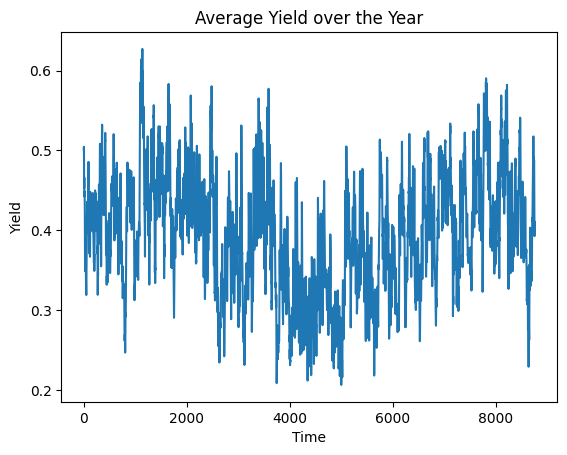

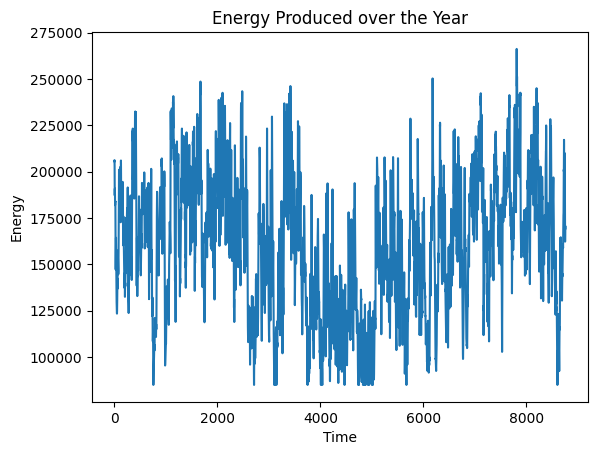

In [69]:
plt.plot(Yield)
plt.xlabel('Time')
plt.ylabel('Yield')
plt.title('Average Yield over the Year')
plt.savefig('average_yield.png')
plt.show()


plt.plot(E_produced)
plt.xlabel('Time')
plt.ylabel('Energy')
plt.title('Energy Produced over the Year')
plt.savefig('energy_produced.png')
plt.show()

In [70]:
windmills_used = sum(S)

print(f"Minimum energy produced in one hour: {M}")
print(f"Average annual yield: {Yield_avg*100}%")
print(f"Energy produced in one year: {E_total}")
print(f"Amount of windmills used: {windmills_used}")

Minimum energy produced in one hour: 85000.0
Average annual yield: 39.481819258158325%
Energy produced in one year: 1401709475.4430447
Amount of windmills used: 246.89039983794737


#Q2

In [73]:
T = np.shape(onshore_yield)[1]
C = np.concatenate((onshore_capacity, offshore_capacity))
Y = np.concatenate((onshore_yield, offshore_yield))
E = C[:, np.newaxis] * Y



Shape of i_matrix_part1: (1284, 643)
Shape of i_matrix_part2: (8760, 643)
Shape of i_matrix: (10044, 643)
Shape of i_vector: (10044,)
Shape of e_matrix_row1: (643,)
Shape of e_matrix_row2: (643,)
Shape of e_matrix: (2, 643)
Shape of e_vector: (2,)
Shape of obj_func_coeffs: (643,)


In [98]:
# print(c)
A_max = 100000

A = np.zeros(T)

i_matrix_part1 = np.concatenate((np.concatenate((np.identity(n), -np.identity(n))), np.zeros((2 * n, 1))), axis=1)
i_matrix_part2 = np.concatenate((-np.transpose(E), np.ones((T, 1))), axis=1)
i_matrix = np.concatenate((i_matrix_part1, i_matrix_part2))
i_vector = np.concatenate((np.ones(n), np.zeros(n + T)))

e_matrix_row1 = np.concatenate((C, [1]))
e_matrix_row2 = np.concatenate((np.zeros(n_onshore), offshore_capacity, [1]))
e_matrix = np.array([e_matrix_row1, e_matrix_row2])
e_vector = np.array([P, k * P])





obj_func_coeffs = np.concatenate((np.zeros(n), [-1]))

solution = linprog(c=obj_func_coeffs, A_ub=i_matrix, b_ub=i_vector, A_eq=e_matrix, b_eq=e_vector)

S = solution.x[:n]
M = -solution.fun

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 643 and the array at index 1 has size 9403

In [86]:
B = solution.x[-2]  # Amount of electricity bought

print(P,B,M,S)

500000 0.0 85000.0 [1.         1.         0.1589345  0.         0.         0.
 0.69648324 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.
 1.         1.         1.         1.         1.         1.
 0.         0.         1.         1.         0.         0.
 0.         0.         1.         1.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.43200756 1.
 0.         1.         0.         1.         1.         1.
 0.         0.         1.         0.         0.13033464 1.
 1.         1.         0.         0.         0.         0.
 1.         1.         1.         1.         1.         1.
 1.         0.         0.         0.         0.         1.
 1.         1.         0.         0.95166541 0.         0.
 0.         0.         0.         1.         1.         1.
 0.         0.         1.         1.         1.         1.
 0.         0.         0.         0. 